# Task 1

In [2]:
import pandas as pd

# Loading the ICU dataset from the provided Excel file
icu_df = pd.read_excel('icu.xlsx')

# Displaying the first few rows of the dataset
icu_df.head()

,ID,STA,AGE,SEX,RACE,SER,CAN,CRN,INF,CPR,...,HRA,PRE,TYP,FRA,PO2,PH,PCO,BIC,CRE,LOC
0,4,1,87,1,1,1,0,0,1,0,...,96,0,1,1,1,1,1,0,0,0
1,8,0,27,1,1,0,0,0,1,0,...,88,0,1,0,0,0,0,0,0,0
2,12,0,59,0,1,0,0,0,0,0,...,80,1,1,0,0,0,0,0,0,0
3,14,0,77,0,1,1,0,0,0,0,...,70,0,0,0,0,0,0,0,0,0
4,27,1,76,1,1,1,0,0,1,0,...,90,1,1,0,0,0,0,0,0,0


In [3]:
data_summary = icu_df.describe()

# Checking for missing values
missing_values = icu_df.isnull().sum()

data_summary, missing_values

(              ID         STA         AGE         SEX        RACE         SER  \
 count  200.00000  200.000000  200.000000  200.000000  200.000000  200.000000   
 mean   444.82000    0.200000   57.545000    0.380000    1.175000    0.535000   
 std    271.91668    0.401004   20.054648    0.486604    0.495584    0.500025   
 min      4.00000    0.000000   16.000000    0.000000    1.000000    0.000000   
 25%    210.25000    0.000000   46.750000    0.000000    1.000000    0.000000   
 50%    412.50000    0.000000   63.000000    0.000000    1.000000    1.000000   
 75%    671.75000    0.000000   72.000000    1.000000    1.000000    1.000000   
 max    929.00000    1.000000   92.000000    1.000000    3.000000    1.000000   
 
               CAN         CRN         INF         CPR  ...        HRA  \
 count  200.000000  200.000000  200.000000  200.000000  ...  200.00000   
 mean     0.100000    0.095000    0.420000    0.065000  ...   98.92500   
 std      0.300753    0.293951    0.494797    0

Data Summary:
We have a dataset with 200 entries.
The average age of patients in the dataset is approximately 57.5 years.
The vital status (STA) indicates that 20% of the patients died, while 80% lived.
The dataset has a roughly balanced gender distribution with 38% females and 62% males.
Most of the patients are of the "White" race (mean value close to 1).
More than half of the admissions are surgical (mean of SER is 0.53).
Variables like CAN, CRN, INF, CPR etc., are binary coded and their mean values give an indication of the proportion of '1's in the dataset.

Missing Values:
There are no missing values in any of the columns.

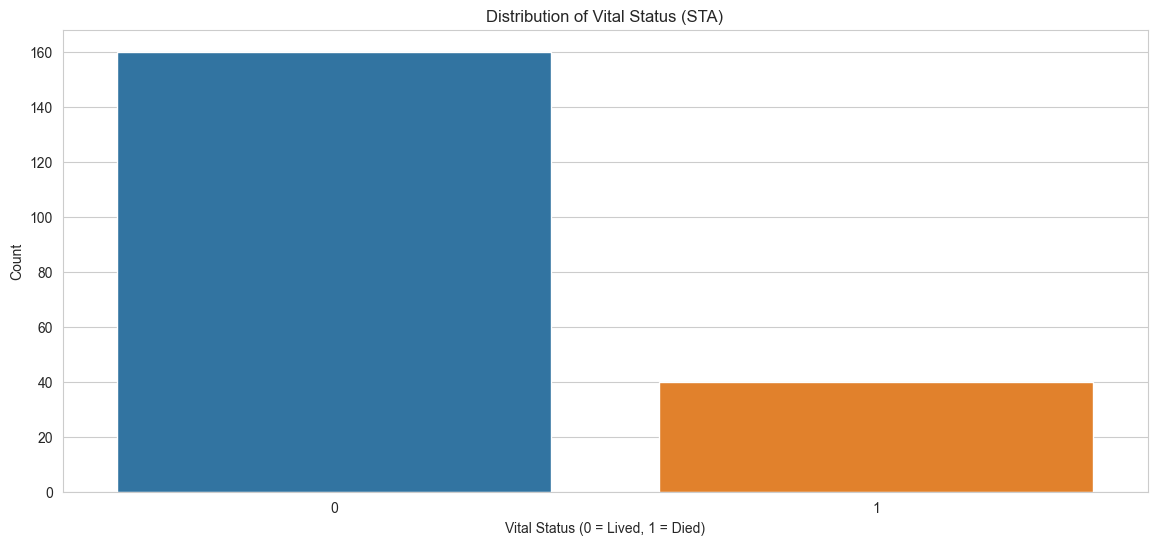

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set_style("whitegrid")

# Initializing the figure
plt.figure(figsize=(14, 6))

# Plotting the distribution of the response variable (STA)
sns.countplot(x='STA', data=icu_df)
plt.title('Distribution of Vital Status (STA)')
plt.xlabel('Vital Status (0 = Lived, 1 = Died)')
plt.ylabel('Count')
plt.show()

The plot illustrates the distribution of the STA variable:

A majority of the patients (80%) in the dataset lived (STA = 0).
20% of the patients died (STA = 1).

Given this imbalance in the distribution, it's essential to take it into consideration when building predictive models, as it might influence the model's performance.



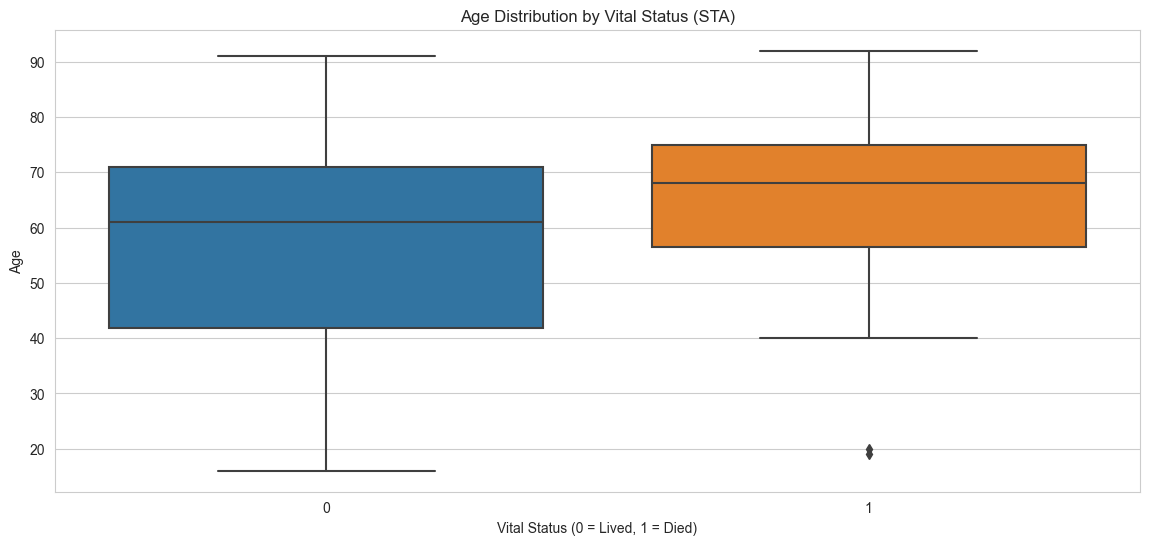

In [5]:
# Initializing the figure
plt.figure(figsize=(14, 6))

# Plotting the age distribution by STA
sns.boxplot(x='STA', y='AGE', data=icu_df)
plt.title('Age Distribution by Vital Status (STA)')
plt.xlabel('Vital Status (0 = Lived, 1 = Died)')
plt.ylabel('Age')
plt.show()


From the boxplot of age distribution by STA:

Patients who lived (STA = 0) tend to have a broader age range, with many younger individuals.
Patients who died (STA = 1) generally seem to be older, as evidenced by the higher median age and the interquartile range.

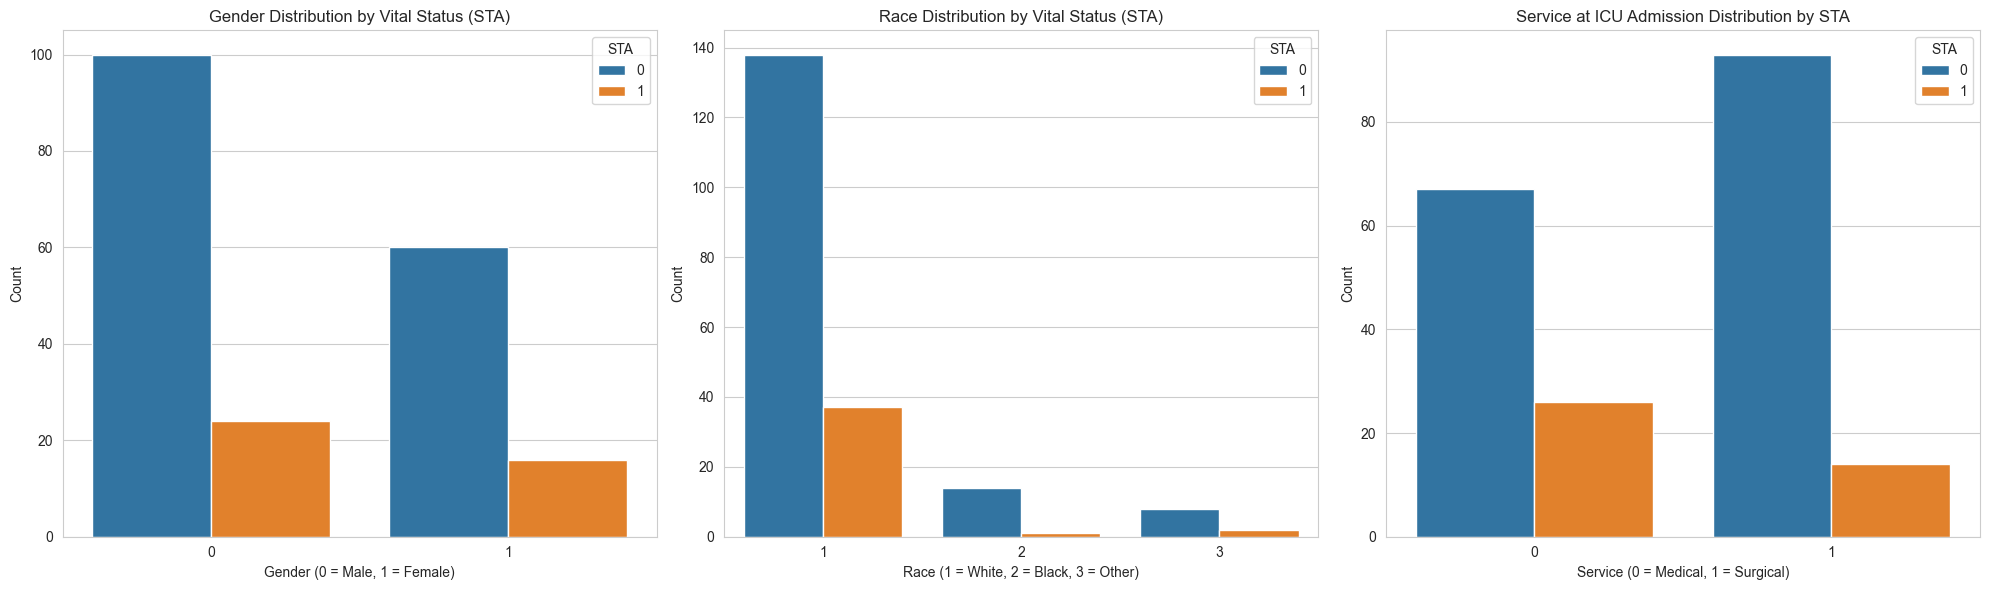

In [6]:
# Initializing the figure
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plotting the distribution of Gender by STA
sns.countplot(x='SEX', hue='STA', data=icu_df, ax=ax[0])
ax[0].set_title('Gender Distribution by Vital Status (STA)')
ax[0].set_xlabel('Gender (0 = Male, 1 = Female)')
ax[0].set_ylabel('Count')
ax[0].legend(title='STA')

# Plotting the distribution of Race by STA
sns.countplot(x='RACE', hue='STA', data=icu_df, ax=ax[1])
ax[1].set_title('Race Distribution by Vital Status (STA)')
ax[1].set_xlabel('Race (1 = White, 2 = Black, 3 = Other)')
ax[1].set_ylabel('Count')
ax[1].legend(title='STA')

# Plotting the distribution of Service at ICU Admission by STA
sns.countplot(x='SER', hue='STA', data=icu_df, ax=ax[2])
ax[2].set_title('Service at ICU Admission Distribution by STA')
ax[2].set_xlabel('Service (0 = Medical, 1 = Surgical)')
ax[2].set_ylabel('Count')
ax[2].legend(title='STA')

# Displaying the plots
plt.tight_layout()
plt.show()


Gender Distribution by STA:
Both genders have a higher number of survivors (STA = 0) than non-survivors (STA = 1). However, the proportion of non-survivors seems slightly higher for females compared to males.
Race Distribution by STA:
The majority of the patients are of the "White" race (Race = 1). The number of survivors is considerably higher for this group.
The "Black" and "Other" race categories have relatively fewer data points, but they still show a higher number of survivors than non-survivors.
Service at ICU Admission by STA:
For both medical and surgical admissions, the number of survivors is higher than non-survivors. However, the proportion of non-survivors is slightly higher for surgical admissions compared to medical ones.


In [7]:
# Calculating the correlation of each feature with the response variable STA
correlation_with_sta = icu_df.corr()['STA'].sort_values(ascending=False)

correlation_with_sta

STA     1.000000e+00
LOC     4.370867e-01
TYP     2.435801e-01
CPR     2.231003e-01
AGE     1.894579e-01
INF     1.823492e-01
CRN     1.790495e-01
CRE     1.720618e-01
BIC     9.491580e-02
PO2     8.293610e-02
PH      7.098647e-02
PRE     3.500700e-02
HRA     3.176090e-02
SEX     2.060214e-02
PCO     1.301043e-17
CAN     1.156482e-17
FRA     7.903328e-18
RACE   -5.057217e-02
ID     -9.008759e-02
SER    -1.854549e-01
SYS    -2.046723e-01
Name: STA, dtype: float64

Positive Correlation: Variables like LOC (Level of Consciousness at ICU Admission), TYP (Type of Admission), CPR (CPR Prior to ICU Admission), and AGE (Age) show a positive correlation with STA. This means that as these variables increase, the likelihood of the STA being 1 (i.e., the patient died) also increases.
Negative Correlation: Variables like SYS (Systolic Blood Pressure at ICU Admission) and SER (Service at ICU Admission) have a negative correlation with STA. This implies that as these variables increase, the likelihood of the STA being 0 (i.e., the patient lived) increases.
Weak or No Correlation: Some variables like PCO, CAN, and FRA show values very close to zero, indicating they might not have a strong linear relationship with STA.
Population of Interest: Based on the data and the response variable STA, the population of interest for this problem seems to be patients admitted to the ICU. The goal appears to be understanding the factors that influence the likelihood of survival or death in the ICU.

Dropdown Conditions: As for dropdown conditions, it depends on the context of the problem. If the analysis is meant for an interactive tool or dashboard where users can filter data based on certain criteria, then dropdown conditions can be useful. For instance, users might want to filter the data based on AGE, SEX, RACE, or SER to get insights specific to a certain group. However, in the context of our exploratory data analysis, we haven't applied any specific dropdown conditions.

# Task 2

In [9]:
# Creating a 2x2 contingency table relating SEX to STA
contingency_table = pd.crosstab(icu_df['SEX'], icu_df['STA'], margins=True, margins_name="Total")
contingency_table.columns = ['Lived', 'Died', 'Total']
contingency_table.index = ['Male', 'Female', 'Total']

contingency_table

,Lived,Died,Total
Male,100,24,124
Female,60,16,76
Total,160,40,200


Probability of Survival:
P
(
Survival
)
=
Number of individuals who lived
Total number of individuals
P(Survival)= 
Total number of individuals
Number of individuals who lived
​	
 

Odds of Survival:
Odds
(
Survival
)
=
Number of individuals who lived
Number of individuals who died
Odds(Survival)= 
Number of individuals who died
Number of individuals who lived
​	
 

In [10]:
# Calculating the probabilities of survival for males and females
probability_male_survival = contingency_table.loc['Male', 'Lived'] / contingency_table.loc['Male', 'Total']
probability_female_survival = contingency_table.loc['Female', 'Lived'] / contingency_table.loc['Female', 'Total']

# Calculating the odds of survival for males and females
odds_male_survival = contingency_table.loc['Male', 'Lived'] / contingency_table.loc['Male', 'Died']
odds_female_survival = contingency_table.loc['Female', 'Lived'] / contingency_table.loc['Female', 'Died']

probability_male_survival, probability_female_survival, odds_male_survival, odds_female_survival


(0.8064516129032258, 0.7894736842105263, 4.166666666666667, 3.75)

Probabilities and Odds of Survival:

Males:
Probability of Survival: 
0.8065
0.8065 or 
80.65
%
80.65%
Odds of Survival: 
4.167
4.167
Females:
Probability of Survival: 
0.7895
0.7895 or 
78.95
%
78.95%
Odds of Survival: 
3.75
3.75
Next, let's compute the odds ratio of survival that compares males to females. The odds ratio is calculated as:

Odds Ratio (OR)
=
Odds of Survival for Males
Odds of Survival for Females
Odds Ratio (OR)= 
Odds of Survival for Females
Odds of Survival for Males
​	
 

In [11]:
# Calculating the odds ratio of survival comparing males to females
odds_ratio = odds_male_survival / odds_female_survival

odds_ratio


1.1111111111111112

Interpretation:
The odds ratio indicates how the odds of an event in one group compare to the odds of the same event in another group. An odds ratio of 1 suggests that the event is equally likely in both groups. An odds ratio greater than 1 indicates that the event is more likely in the first group, while an odds ratio less than 1 indicates that the event is less likely in the first group compared to the second.

Conclusion:
Given our calculated odds ratio of 
1.1111
1.1111, this suggests that males have slightly higher odds of survival compared to females. However, it's important to note that this difference is not substantial. The probabilities of survival for both genders are quite close, with males having an 
80.65
%
80.65% chance and females having a 
78.95
%
78.95% chance. The odds ratio reflects this minor difference.

While there is a minor difference in the odds of survival between males and females, it's essential to consider the context and the dataset's limitations. The difference might not be clinically significant, and further investigation with a larger dataset and potential confounding variables might be necessary to draw a more definitive conclusion.

Do note that while the odds ratio provides insight into the relative odds between two groups, it doesn't directly convey information about the absolute probabilities of the event of interest. In this scenario, both males and females have relatively high survival probabilities, which is an important context when interpreting the odds ratio.

# Task 3

In [12]:
# Creating a 2x2 contingency table relating TYP to STA
contingency_table_typ = pd.crosstab(icu_df['TYP'], icu_df['STA'], margins=True, margins_name="Total")
contingency_table_typ.columns = ['Lived', 'Died', 'Total']
contingency_table_typ.index = ['Elective', 'Emergency', 'Total']

contingency_table_typ

,Lived,Died,Total
Elective,51,2,53
Emergency,109,38,147
Total,160,40,200


Probability of Survival:
P
(
Survival
)
=
Number of individuals who lived
Total number of individuals
P(Survival)= 
Total number of individuals
Number of individuals who lived
​	
 

Odds of Survival:
Odds
(
Survival
)
=
Number of individuals who lived
Number of individuals who died
Odds(Survival)= 
Number of individuals who died
Number of individuals who lived
​	
 

Let's calculate these for both types of admissions.

In [13]:
# Calculating the probabilities of survival for elective and emergency admissions
probability_elective_survival = contingency_table_typ.loc['Elective', 'Lived'] / contingency_table_typ.loc['Elective', 'Total']
probability_emergency_survival = contingency_table_typ.loc['Emergency', 'Lived'] / contingency_table_typ.loc['Emergency', 'Total']

# Calculating the odds of survival for elective and emergency admissions
odds_elective_survival = contingency_table_typ.loc['Elective', 'Lived'] / contingency_table_typ.loc['Elective', 'Died']
odds_emergency_survival = contingency_table_typ.loc['Emergency', 'Lived'] / contingency_table_typ.loc['Emergency', 'Died']

probability_elective_survival, probability_emergency_survival, odds_elective_survival, odds_emergency_survival


(0.9622641509433962, 0.7414965986394558, 25.5, 2.8684210526315788)

Probabilities and Odds of Survival:

Elective Admission:
Probability of Survival: 
0.9623
0.9623 or 
96.23
%
96.23%
Odds of Survival: 
25.5
25.5
Emergency Admission:
Probability of Survival: 
0.7415
0.7415 or 
74.15
%
74.15%
Odds of Survival: 
2.8684
2.8684
Next, let's compute the odds ratio of survival that compares elective to emergency admissions. The odds ratio is calculated as:

Odds Ratio (OR)
=
Odds of Survival for Elective
Odds of Survival for Emergency
Odds Ratio (OR)= 
Odds of Survival for Emergency
Odds of Survival for Elective
​	
 

In [14]:
# Calculating the odds ratio of survival comparing elective to emergency admissions
odds_ratio_typ = odds_elective_survival / odds_emergency_survival

odds_ratio_typ


8.889908256880734

The odds ratio (OR) comparing the survival of elective admissions to emergency admissions is 
OR
=
8.8899
OR=8.8899.

Interpretation:
An odds ratio of 1 would mean that both types of admissions have the same odds of survival.
An odds ratio greater than 1 indicates that the first type (in this case, elective admissions) has higher odds of survival compared to the second type (emergency admissions).
An odds ratio less than 1 would mean that the second type (emergency admissions) has higher odds of survival compared to the first type (elective admissions).
Given our calculated odds ratio of 
8.8899
8.8899, this suggests that patients admitted electively have considerably higher odds of survival compared to those admitted due to emergencies.

Conclusion:
Patients with elective admissions have significantly higher odds of survival compared to those with emergency admissions, as reflected by the high odds ratio. This finding makes intuitive sense since elective admissions often involve planned medical procedures or treatments, where the patient's condition and risks are assessed beforehand. In contrast, emergency admissions are typically more unpredictable and can involve critical or life-threatening situations.

This insight is crucial for healthcare professionals and administrators to allocate resources appropriately, understand risks, and inform patients and their families about potential outcomes.

However, it's essential to consider other confounding factors and variables that might influence this relationship. Further analysis and potentially more extensive datasets would provide a more comprehensive understanding of this relationship.

# Task 4

## a) Logistic Regression Model and Logit Transformation


Let's tackle this step by step:

a) Logistic Regression Model and Logit Transformation
In logistic regression, we model the probability 
P
(
Y
=
1
)
P(Y=1) (in this case, 
S
T
A
=
1
STA=1) as a function of the predictors. For a single predictor 
X
X (in this case, 
A
G
E
AGE), the model is:

P
(
Y
=
1
)
=
1
1
+
e
−
(
β
0
+
β
1
X
)
P(Y=1)= 
1+e 
−(β 
0
​	
 +β 
1
​	
 X)
 
1
​	
 
Where:

P
(
Y
=
1
)
P(Y=1) is the probability that 
S
T
A
=
1
STA=1.
β
0
β 
0
​	
  and 
β
1
β 
1
​	
  are the coefficients to be estimated from the data.
e
e is the base of the natural logarithm (approximately equal to 2.71828).
For the logit transformation, we take the natural logarithm of the odds of the event:

log
⁡
(
P
(
Y
=
1
)
1
−
P
(
Y
=
1
)
)
=
β
0
+
β
1
X
log( 
1−P(Y=1)
P(Y=1)
​	
 )=β 
0
​	
 +β 
1
​	
 X
Where:

The left side is the log odds (or logit).
The right side is a linear combination of the predictors.

## b) Scatterplot of STA by AGE

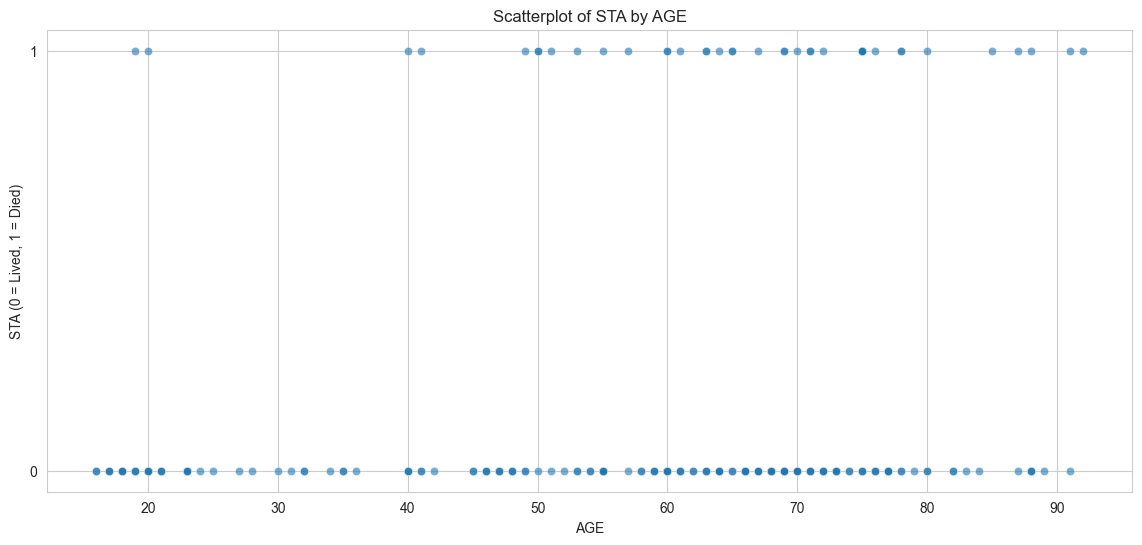

In [16]:
plt.figure(figsize=(14, 6))

# Plotting a scatterplot of STA by AGE
sns.scatterplot(x=icu_df['AGE'], y=icu_df['STA'], alpha=0.6)
plt.title('Scatterplot of STA by AGE')
plt.xlabel('AGE')
plt.ylabel('STA (0 = Lived, 1 = Died)')
plt.yticks([0, 1])

# Displaying the plot
plt.show()

From the scatterplot of STA by AGE, we can make the following observations:

The plot displays two distinct levels of STA: 
0
0 (Lived) and 
1
1 (Died).
There's a noticeable concentration of deaths (STA = 1) among older individuals, while younger individuals predominantly belong to the STA = 0 category.
As age increases, the density of points indicating death seems to increase, suggesting a potential relationship between age and the likelihood of death.
Conclusion:
Age appears to be a discriminator between the levels of STA to some extent. Older age seems to be associated with a higher likelihood of death (STA = 1). However, it's essential to note that while age can provide some discrimination, there are still many older individuals who survived and younger individuals who did not. This suggests that while age might be a significant factor, it's not the sole determinant, and other factors could play a role in influencing survival outcomes. A logistic regression analysis, as suggested in part (a), could help quantify the relationship between age and STA and provide more insights.

# Task 5